# Preparing data for linear regression

In [1]:
#import data_utils as du

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
LOCATION = 'munich'

df_lst = pd.read_csv(LOCATION + '/listings.csv.gz')

In [3]:
pd.options.display.max_rows=100
pd.options.display.max_columns=None
pd.options.display.max_colwidth=30

---

In [4]:
df_lst

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/roo...,20210322162337,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,517685,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,NaN,NaN,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Hadern,NaN,48.11476,11.48782,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""E...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/roo...,20210322162337,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,581737,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,100%,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,3.0,3.0,"['email', 'phone', 'review...",t,t,NaN,Berg am Laim,NaN,48.12071,11.63758,Entire apartment,Entire home/apt,5,NaN,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/roo...,20210322162337,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,630556,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,0%,85%,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'review...",t,t,NaN,Maxvorstadt,NaN,48.15199,11.56482,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/roo...,20210322162337,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,765694,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,NaN,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Pasing-Obermenzing,NaN,48.13898,11.46612,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Washer"", ""Ir

## Drop columns with all missing value

In [5]:
drop_me = df_lst.columns[df_lst.isnull().all()]
drop_me

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated',
       'license'],
      dtype='object')

In [6]:
df_lst.drop(columns=drop_me, axis=1, inplace=True)

In [7]:
df_lst.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/roo...,20210322162337,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,517685,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,NaN,NaN,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Hadern,48.11476,11.48782,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""E...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/roo...,20210322162337,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,581737,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,100%,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,3.0,3.0,"['email', 'phone', 'review...",t,t,NaN,Berg am Laim,48.12071,11.63758,Entire apartment,Entire home/apt,5,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/roo...,20210322162337,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,630556,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,0%,85%,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'review...",t,t,NaN,Maxvorstadt,48.15199,11.56482,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/roo...,20210322162337,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,765694,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,NaN,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Pasing-Obermenzing,48.13898,11.46612,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Washer"", ""Iron"", ""Dedica...",$52.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,0,0,0,0,2021-03-23,34,2,0,2011-08-15,2020-12-23,93.0

## Set proper data types for numerical values

In [8]:
df_lst.price=df_lst.price.replace(to_replace='[\$,]', value='', regex=True).astype(float)

In [9]:
df_lst.host_response_rate = df_lst.host_response_rate.replace(to_replace='[\%,]', value='', regex=True).astype(float)/100

In [10]:
df_lst.host_acceptance_rate = df_lst.host_acceptance_rate.replace(to_replace='[\%,]', value='', regex=True).astype(float)/100

In [11]:
df_lst[['price', 'host_response_rate', 'host_acceptance_rate']].head()

,price,host_response_rate,host_acceptance_rate
0,80.0,NaN,NaN
1,95.0,1.0,1.00
2,99.0,0.0,0.85
3,52.0,NaN,1.00
4,55.0,1.0,0.90


## Set proper data types for boolean values

In [12]:
def replace_boolean_values(col: pd.Series) -> pd.Series:
    '''
    replace 't' with 1
    replace 'f' with 0
    fill NaN with 3
    convert columnt to INT 
    '''
    col = col.replace(to_replace='t', value=1).replace(to_replace='f', value=0)
    col.fillna(value='3', inplace=True)
    return col.astype(int)

In [13]:
df_lst.host_is_superhost = replace_boolean_values(df_lst.host_is_superhost)
df_lst.host_is_superhost.value_counts()

0    4062
1     855
3     156
Name: host_is_superhost, dtype: int64

In [14]:
df_lst.host_has_profile_pic = replace_boolean_values(df_lst.host_has_profile_pic)
df_lst.host_has_profile_pic.value_counts()

1    4895
3     156
0      22
Name: host_has_profile_pic, dtype: int64

In [15]:
df_lst.host_identity_verified = replace_boolean_values(df_lst.host_identity_verified)
df_lst.host_identity_verified.value_counts()

1    3811
0    1106
3     156
Name: host_identity_verified, dtype: int64

In [16]:
df_lst.instant_bookable = replace_boolean_values(df_lst.instant_bookable)
df_lst.instant_bookable.value_counts()

0    3706
1    1367
Name: instant_bookable, dtype: int64

In [17]:
df_lst.has_availability = replace_boolean_values(df_lst.has_availability)
df_lst.has_availability.value_counts()

1    5053
0      20
Name: has_availability, dtype: int64

## Split multi-string values into columns with 0 or 1 (amenities, host_verifications)

In [18]:
def convert_strings_to_columns(df, col: str) -> pd.DataFrame:
    
    columns_set = set()
    for i in range(0, df.shape[0]):
        columns_set = set.union(columns_set, df.loc[i][col].replace('"', '').replace('[', '').replace(']', '').replace(' ', '').replace('\\', '').split(sep=','))
        
    for new_col in columns_set:
        try:
            df.insert(len(df.columns), new_col, 0)
        except:
            print(new_col + " couldn't be inserted")
    
    for i in range(0, df.shape[0]):
        new_columns = df.loc[i].amenities.replace('"', '').replace('[', '').replace(']', '').replace(' ', '').replace('\\', '').split(sep=',')

        for new_col in new_columns:
            df.loc[i, new_col] = 1 
            
    return df, columns_set

In [19]:
df_lst, cols = convert_strings_to_columns(df_lst, 'amenities')
df_lst

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Backyard,table,Paidparkinggarageonpremisesu2013100spaces,anddesk,Securitycamerasonproperty,Hottub,Fullkitchen,desk,Lockbox,Siemenselectricstove,15spaces,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,40HDTVwithstandardcable,Onsitebar,Bidet,Iron,Sharedgyminbuilding,Bedsheetsandpillows,Dryingrackforclothing,closet,Niveabodysoap,wechselndbodysoap,einePlatteistkaputtelectricstove,Clothingstorage,allesBio,Wifiu201316Mbps,HarmanKardonsoundsystemwithaux,Ceilingfan,Paidparkinggarageonpremises,Clothingstorage:closetandwardrobe,Laundromatnearby,Breakfastbuffetavailableu2014u20ac12perpersonperday,Centralairconditioning,Stove,Wifiu201350000Mbps,Dedicatedworkspace:officechair,Paidstreetparkingoffpremisesu2013EUR6perday,Radiantheating,Privatehottub,Bognershampoo,Freedryeru2013Inunit,Adatoiletries,Petsallowed,Sonossoundsystemwithaux,45HDTVwithNetflix,Fireextinguisher,BOSEBluetoothsoundsystem,Paidparkinggarageonpremisesu2013EUR15perday,Dishesandsilverware,Liebherrrefrigerator,Elevator,Freewasher,Diningtable,Childrenu2019sdinnerware,Sharedsauna,Sharedfencedgardenorbackyard,Wifiu201310Mbps,Cleaningbeforecheckout,Pocketwifi,Tablecornerguards,Washeru2013u00a0Inbuilding,Freezer,Outdoorfurniture,Conditioner,SchottCeran,Gym,Bikes,Hostgreetsyou,Babybath,Keurigcoffeemachine,HarmanKardonBluetoothsoundsystem,Freewifi,mit4*Gefrierfachrefrigerator,Bognerconditioner,BestforYOUbodysoap,HDTV,Privategardenorbackyard,Singlelevelhome,32HDTVwithstandardcable,Paidparkingonpremises,Luggagedropoffallowed,Pool,TVwithpremiumcable,Hausmarkebodysoap,Housebikes,DuschdasGelbodysoap,andwardrobe,HDTVwithpremiumcable,Showergel,Room-darkeningshades,1space,Minifridge,Paidparkinggarageonpremisesu201313spaces,55HDTVwithAmazonPrimeVideo,Refrigerator,Clothingstorage:walk-inclosetandwardrobe,Clothingstorage:wardrobe,Wifi,EpsonBluetoothsoundsystem,officechair,Smartlock,Trashcompactor,linens,Cookingbasics,Bodysoap,Safe,Clothingstorage:walk-incloset,Inductionstove,Dedicatedworkspace:deskandofficechair,Barbecueutensils,Dishwasher,Self-parkingu2014u20ac12/day,Boschrefrigerator,Gyminbuilding,Paidparkinglotonpremisesu2013EUR20perday,Privatefencedgardenorbackyard,Dedicatedworkspace:desk,Freeparkinggarageonpremisesu20131space,Childrenu2019sbooksandtoys,Freeparkingonpremises,Concierge,Firstaidkit,Seifenbodysoap,Essentials,EVcharger,Kitchen,Roomservice,Stainlesssteeloven,Ritualsbodysoap,Indoorfireplace,Wifiu20131000Mbps,Outdoordiningarea,HDTVwithNetflix,Aplusrefrigerator,Bathtub,Bosch(separaterDesigner-Ku00fchlschrank)mitGefrierfachrefrigerator,THEFLAGownBrandbodysoap,Babymonitor,Complimentaryselfparking,BOSEsoundsystemwithBluetoothandaux,HighEndInductionScottinductionstove,Outletcovers,Freedryeru2013Inbuilding,Gameconsole,Paidwasheru2013Inbuilding,Crib,Siem

In [20]:
df_lst, cols = convert_strings_to_columns(df_lst, 'host_verifications')
df_lst

 couldn't be inserted


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Backyard,table,Paidparkinggarageonpremisesu2013100spaces,anddesk,Securitycamerasonproperty,Hottub,Fullkitchen,desk,Lockbox,Siemenselectricstove,15spaces,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,40HDTVwithstandardcable,Onsitebar,Bidet,Iron,Sharedgyminbuilding,Bedsheetsandpillows,Dryingrackforclothing,closet,Niveabodysoap,wechselndbodysoap,einePlatteistkaputtelectricstove,Clothingstorage,allesBio,Wifiu201316Mbps,HarmanKardonsoundsystemwithaux,Ceilingfan,Paidparkinggarageonpremises,Clothingstorage:closetandwardrobe,Laundromatnearby,Breakfastbuffetavailableu2014u20ac12perpersonperday,Centralairconditioning,Stove,Wifiu201350000Mbps,Dedicatedworkspace:officechair,Paidstreetparkingoffpremisesu2013EUR6perday,Radiantheating,Privatehottub,Bognershampoo,Freedryeru2013Inunit,Adatoiletries,Petsallowed,Sonossoundsystemwithaux,45HDTVwithNetflix,Fireextinguisher,BOSEBluetoothsoundsystem,Paidparkinggarageonpremisesu2013EUR15perday,Dishesandsilverware,Liebherrrefrigerator,Elevator,Freewasher,Diningtable,Childrenu2019sdinnerware,Sharedsauna,Sharedfencedgardenorbackyard,Wifiu201310Mbps,Cleaningbeforecheckout,Pocketwifi,Tablecornerguards,Washeru2013u00a0Inbuilding,Freezer,Outdoorfurniture,Conditioner,SchottCeran,Gym,Bikes,Hostgreetsyou,Babybath,Keurigcoffeemachine,HarmanKardonBluetoothsoundsystem,Freewifi,mit4*Gefrierfachrefrigerator,Bognerconditioner,BestforYOUbodysoap,HDTV,Privategardenorbackyard,Singlelevelhome,32HDTVwithstandardcable,Paidparkingonpremises,Luggagedropoffallowed,Pool,TVwithpremiumcable,Hausmarkebodysoap,Housebikes,DuschdasGelbodysoap,andwardrobe,HDTVwithpremiumcable,Showergel,Room-darkeningshades,1space,Minifridge,Paidparkinggarageonpremisesu201313spaces,55HDTVwithAmazonPrimeVideo,Refrigerator,Clothingstorage:walk-inclosetandwardrobe,Clothingstorage:wardrobe,Wifi,EpsonBluetoothsoundsystem,officechair,Smartlock,Trashcompactor,linens,Cookingbasics,Bodysoap,Safe,Clothingstorage:walk-incloset,Inductionstove,Dedicatedworkspace:deskandofficechair,Barbecueutensils,Dishwasher,Self-parkingu2014u20ac12/day,Boschrefrigerator,Gyminbuilding,Paidparkinglotonpremisesu2013EUR20perday,Privatefencedgardenorbackyard,Dedicatedworkspace:desk,Freeparkinggarageonpremisesu20131space,Childrenu2019sbooksandtoys,Freeparkingonpremises,Concierge,Firstaidkit,Seifenbodysoap,Essentials,EVcharger,Kitchen,Roomservice,Stainlesssteeloven,Ritualsbodysoap,Indoorfireplace,Wifiu20131000Mbps,Outdoordiningarea,HDTVwithNetflix,Aplusrefrigerator,Bathtub,Bosch(separaterDesigner-Ku00fchlschrank)mitGefrierfachrefrigerator,THEFLAGownBrandbodysoap,Babymonitor,Complimentaryselfparking,BOSEsoundsystemwithBluetoothandaux,HighEndInductionScottinductionstove,Outletcovers,Freedryeru2013Inbuilding,Gameconsole,Paidwasheru2013Inbuilding,Crib,Siem

## Resolve categorical variables

In [21]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
    '''
    
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(columns=col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            pass
    
    return df.copy()

In [22]:
df_lst.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'calendar_last_scraped', 'first_review', 'last_review'],
      dtype='object')

In [23]:
df_lst.select_dtypes(include='object')

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,calendar_last_scraped,first_review,last_review
0,https://www.airbnb.com/roo...,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,"['email', 'phone', 'review...","Munich, Bavaria, Germany",Hadern,Entire apartment,Entire home/apt,1 bath,"[""Dedicated workspace"", ""E...",2021-03-23,2011-10-03,2019-10-03
1,https://www.airbnb.com/roo...,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,"['email', 'phone', 'review...",NaN,Berg am Laim,Entire apartment,Entire home/apt,1 bath,"[""Microwave"", ""Kitchen"", ""...",2021-04-02,2011-07-08,2019-10-06
2,https://www.airbnb.com/roo...,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,"['email', 'phone', 'review...",NaN,Maxvorstadt,Entire apartment,Entire home/apt,1 bath,"[""Hair dryer"", ""Bed linens...",2021-04-01,2011-06-04,2020-12-30
3,https://www.airbnb.com/roo...,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,"['email', 'phone', 'review...","Munich, Bavaria, Germany",Pasing-Obermenzing,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Iron"", ""Dedica...",2021-03-23,2011-08-15,2020-12-23
4,https://www.airbnb.com/roo...,2021-04-02,"Own floor & bath, parking ...",Enjoy a quiet neighbourhoo...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Alex,2010-04-14,"Munich, Bayern, Germany",We love to travel and drea...,within a few hours,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Sendling - Westpark,"['email', 'phone', 'review...",NaN,Sendling-Westpark,Private room in house,Private room,1 private bath,"[""Microwave"", ""Kitchen"", ""...",2021-04-02,2011-09-25,2020-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,https://www.airbnb.com/roo...,2021-03-23,Luxury Designer Apartment ...,The apartment is located w...,The street here is very al...,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Daniel,2013-02-28,"Munich, Bavaria, Germany",american\r\ni like to eat\...,within an hour,https://a0.muscache.com/im...,https://a0.muscache.com/im...,NaN,"['email', 'phone', 'facebo...","Munich, Bavaria, Germany",Altstadt-Lehel,Entire apartment,Entire home/apt,2 baths,"[""Washer"", ""Iron"", ""Dedica...",2021-03-23,NaN,NaN
5069,https://www.airbnb.com/roo...,2021-03-23,Apartment with Balcony in ...,Studio with balcony in cen...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Silvia,2016-01-10,"Valladolid, Castilla y Leó...",Hola! Soy Silvia ¡Nos vemos!,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,NaN,"['email', 'phone', 'review...",NaN,Neuhausen-Nymphenburg,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Long term stay...",2021-03-23,NaN,NaN

In [24]:
df_lst.neighbourhood.value_counts()

Munich, Bayern, Germany                     2282
Munich, Bavaria, Germany                     283
Munich, BY, Germany                          191
Munich, Germany                               11
Karlsfeld, Bayern, Germany                     3
M, Bayern, Germany                             1
München , Bavaria, Germany                     1
Munich, Deutschland, Germany                   1
Munich, deutchland, Germany                    1
Karlsfeld, Bavaria, Germany                    1
Au-Haidhausen, BY, Germany                     1
Múnich, Baviera, Germany                       1
München Nymphenburg , Germany                  1
München , Bayern, Germany                      1
Munich  Schwabing-West, Bavaria, Germany       1
München Solln, BY, Germany                     1
Haar, Bayern, Germany                          1
München Moosach, Bavaria, Germany              1
München, Bayern, DE, Bayern, Germany           1
Name: neighbourhood, dtype: int64

In [25]:
cat_var_cols = ['host_location', 'host_response_time', 'host_neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']

In [26]:
df_lst_data = create_dummy_df(df=df_lst, cat_cols=cat_var_cols, dummy_na=True)
df_lst_data

id                    listing_url       scrape_id last_scraped  \
0        97945  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
1       114695  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
2       127383  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
3       159634  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
4       170154  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
...        ...                            ...             ...          ...   
5068  48761022  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5069  48778478  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5070  48780743  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
5071  48780981  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5072  48797828  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
0     Deluxw-Apartm. with roof t...  <b>The space</b><br />We o...   
1     Apartment Munich/East with...  <b>The space</b><br />It´s...   
2     City apartment next to Pin...  <b>The space</b><br />My c...   
3     Fancy, bright central roof...  <b>The space</b><br />The ...   
4     Own floor & bath, parking ...  Enjoy a quiet neighbourhoo...   
...                             ...                            ...   
5068  Luxury Designer Apartment ...  The apartment is located w...   
5069  Apartment with Balcony in ...  Studio with balcony in cen...   
5070  Wunderschöne Wohnung in de...  <b>The space</b><br />Voll...   
5071  Entire apartment in the be...  Entire apartment in the be...   
5072  Fully- furnished, central ...  Central apartment in Munic...   

              neighborhood_overview                    picture_url    host_id  \
0     We are living in a outskir...  https://a0.muscache.com/pi...     517685   
1                               NaN  https://a0.muscache.com/pi...     581737   
2                               NaN  https://a0.muscache.com/pi...     630556   
3     Very quiet, green, squirre...  https://a0.muscache.com/pi...     765694   
4                               NaN  https://a0.muscache.com/pi...     108297   
...                             ...                            ...        ...   
5068  The street here is very al...  https://a0.muscache.com/pi...    5265984   
5069                            NaN  https://a0.muscache.com/pi...   54142901   
5070  Super zentral, alles zu Fu...  https://a0.muscache.com/pi...  317502651   
5071                            NaN  https://a0.muscache.com/pi...  161107012   
5072                            NaN  https://a0.muscache.com/pi...   48130242   

                           host_url   host_name  host_since  \
0     https://www.airbnb.com/use...    Angelika  2011-04-18   
1     https://www.airbnb.com/use...     Stephan  2011-05-12   
2     https://www.airbnb.com/use...       Sonja  2011-05-26   
3     https://www.airbnb.com/use...       Sanna  2011-07-01   
4     https://www.airbnb.com/use...        Alex  2010-04-14   
...                             ...         ...         ...   
5068  https://www.airbnb.com/use...      Daniel  2013-02-28   
5069  https://www.airbnb.com/use...      Silvia  2016-01-10   
5070  https://www.airbnb.com/use...  Maximilian  2019-12-14   
5071  https://www.airbnb.com/use...         Til  2017-12-03   
5072  https://www.airbnb.com/use...     Silvana  2015-11-04   

                         host_about  host_response_rate  host_acceptance_rate  \
0     Ich freue mich auf viele i...                 NaN                   NaN   
1     I am looking forward to me...                 1.0                  1.00   
2     Hi, mein Name ist Sonja un...                 0.0                  0.85   
3     outdoorsy sportive Person ...                 NaN                  1.00   
4     We love to travel and drea...                 1.0                  0.90   
...               

## Convert string columns to datetime

In [27]:
#df_lst_data.last_scraped = pd.to_datetime(df_lst_data.last_scraped)
#df_lst_data.host_since = pd.to_datetime(df_lst_data.host_since)
#df_lst_data.calendar_last_scraped = pd.to_datetime(df_lst_data.calendar_last_scraped)
#df_lst_data.first_review = pd.to_datetime(df_lst_data.first_review)
#df_lst_data.last_review = pd.to_datetime(df_lst_data.last_review)

## Select numerical columns only and fill NaN

In [28]:
df_lst_data.dtypes.value_counts()

uint8      496
int64      365
float64     23
object      18
dtype: int64

In [29]:
df_list_num = df_lst_data.select_dtypes(include=['float64', 'int64', 'uint8']).copy()

In [30]:
df_list_num.columns[df_list_num.isnull().mean()>0.6]

Index([], dtype='object')

In [31]:
df_list_num.fillna(df_list_num.mean(), inplace=True)
df_list_num

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Backyard,table,Paidparkinggarageonpremisesu2013100spaces,anddesk,Securitycamerasonproperty,Hottub,Fullkitchen,desk,Lockbox,Siemenselectricstove,15spaces,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,40HDTVwithstandardcable,Onsitebar,Bidet,Iron,Sharedgyminbuilding,Bedsheetsandpillows,Dryingrackforclothing,closet,Niveabodysoap,wechselndbodysoap,einePlatteistkaputtelectricstove,Clothingstorage,allesBio,Wifiu201316Mbps,HarmanKardonsoundsystemwithaux,Ceilingfan,Paidparkinggarageonpremises,Clothingstorage:closetandwardrobe,Laundromatnearby,Breakfastbuffetavailableu2014u20ac12perpersonperday,Centralairconditioning,Stove,Wifiu201350000Mbps,Dedicatedworkspace:officechair,Paidstreetparkingoffpremisesu2013EUR6perday,Radiantheating,Privatehottub,Bognershampoo,Freedryeru2013Inunit,Adatoiletries,Petsallowed,Sonossoundsystemwithaux,45HDTVwithNetflix,Fireextinguisher,BOSEBluetoothsoundsystem,Paidparkinggarageonpremisesu2013EUR15perday,Dishesandsilverware,Liebherrrefrigerator,Elevator,Freewasher,Diningtable,Childrenu2019sdinnerware,Sharedsauna,Sharedfencedgardenorbackyard,Wifiu201310Mbps,Cleaningbeforecheckout,Pocketwifi,Tablecornerguards,Washeru2013u00a0Inbuilding,Freezer,Outdoorfurniture,Conditioner,SchottCeran,Gym,Bikes,Hostgreetsyou,Babybath,Keurigcoffeemachine,HarmanKardonBluetoothsoundsystem,Freewifi,mit4*Gefrierfachrefrigerator,Bognerconditioner,BestforYOUbodysoap,HDTV,Privategardenorbackyard,Singlelevelhome,32HDTVwithstandardcable,Paidparkingonpremises,Luggagedropoffallowed,Pool,TVwithpremiumcable,Hausmarkebodysoap,Housebikes,DuschdasGelbodysoap,andwardrobe,HDTVwithpremiumcable,Showergel,Room-darkeningshades,1space,Minifridge,Paidparkinggarageonpremisesu201313spaces,55HDTVwithAmazonPrimeVideo,Refrigerator,Clothingstorage:walk-inclosetandwardrobe,Clothingstorage:wardrobe,Wifi,EpsonBluetoothsoundsystem,officechair,Smartlock,Trashcompactor,linens,Cookingbasics,Bodysoap,Safe,Clothingstorage:walk-incloset,Inductionstove,Dedicatedworkspace:deskandofficechair,Barbecueutensils,Dishwasher,Self-parkingu2014u20ac12/day,Boschrefrigerator,Gyminbuilding,Paidparkinglotonpremisesu2013EUR20perday,Privatefencedgardenorbackyard,Dedicatedworkspace:desk,Freeparkinggarageonpremisesu20131space,Childrenu2019sbooksandtoys,Freeparkingonpremises,Concierge,Firstaidkit,Seifenbodysoap,Essentials,EVcharger,Kitchen,Roomservice,Stainlesssteeloven,Ritualsbodysoap,Indoorfireplace,Wifiu20131000Mbps,Outdoordiningarea,HDTVwithNetflix,Aplusrefrigerator,Bathtub,Bosch(separaterDesigner-Ku00fchlschrank)mitGefrierfachrefrigerator,THEFLAGownBrandbodysoap,Babymonitor,Complimentaryselfparking,BOSEsoundsystemwithBluetoothandaux,HighEndInductionScottinductionstove,Outletcovers,Freedryeru2013Inbuilding,Gameconsole,Paidwasheru2013Inbuilding,Crib,Siemensrefrigerator,BestforYoushampoo,wechselndconditioner,Soundsystem,Ritualsshampoo,Privateentrance,CableTV,Keypad,-standard-bodysoap,Paidparkinggarageonpremisesu2013150spaces,Hangers,Toiletries,Paidparkingoffpremises,Waterfront,PanasonicOven,Coffeemaker,Anyahbodysoap,Pingpongtable,Freeresidentialgarageonpremises,Soundsystemwithaux,HDTVwithstandardcable,Pai

## Cut off price outlliers

In [32]:
df_list_num.price.describe()

count     5073.000000
mean       113.464419
std        274.349634
min          0.000000
25%         50.000000
50%         79.000000
75%        120.000000
max      10762.000000
Name: price, dtype: float64

<AxesSubplot:>

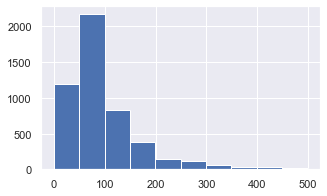

In [33]:
plt.rcParams["figure.figsize"] = [5, 3]
df_list_num[df_list_num.price < 500].price.hist()

In [34]:
df_list_num = df_list_num[df_list_num.price < 500]
df_list_num.shape

(4998, 884)

## Looking at relevant features

In [35]:
# Create list of features correlated (+/-) with the price
y_target_col = 'price'
relevant = np.abs(df_list_num.corr()[y_target_col]).sort_values(ascending=False)

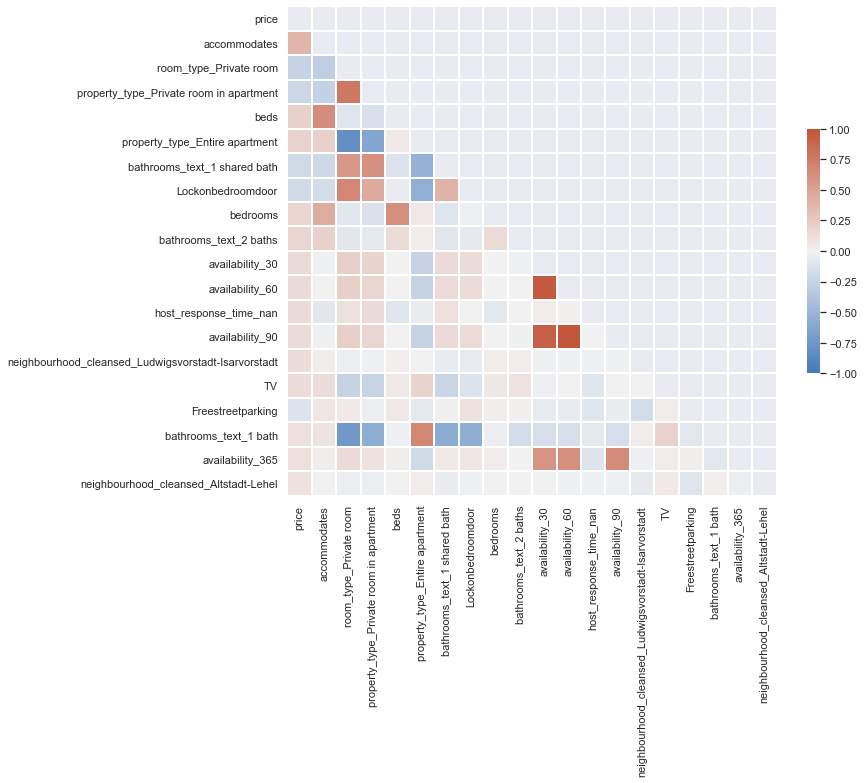

In [36]:
# Print heatmap for the first 20 relevant features
corr = df_list_num[relevant[:20].index].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5});

Some features are obvious. It's more expesive to a property with the baths than one with a shared bath. Location in Ludwigsvorstadt-Isarvorstadt and Lehel is relevant relevant as well.

In [37]:
relevant.drop(y_target_col, inplace=True)

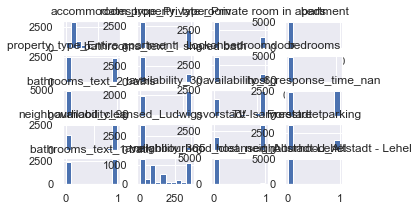

In [38]:
df_list_num[relevant[:20].index].hist();

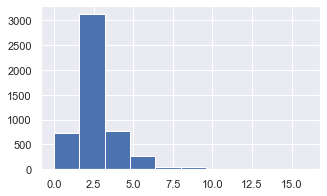

In [39]:
df_list_num['accommodates'].hist();

In [40]:
df_list_num = df_list_num[df_list_num.accommodates<10]

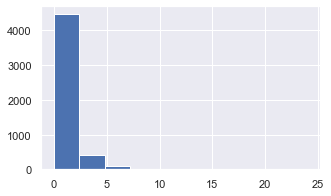

In [41]:
df_list_num['beds'].hist();

In [42]:
df_list_num = df_list_num[df_list_num.beds<7]

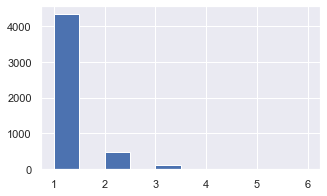

In [43]:
df_list_num[df_list_num.bedrooms<10].bedrooms.hist();

In [44]:
df_list_num = df_list_num[df_list_num.bedrooms<4]

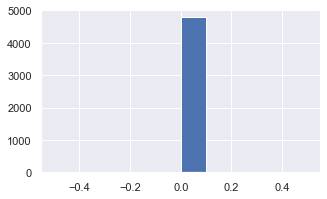

In [45]:
df_list_num[df_list_num['bathrooms_text_2 baths']<0.4]['bathrooms_text_2 baths'].hist();

In [46]:
df_list_num['bathrooms_text_2 baths'].value_counts()

0    4799
1     123
Name: bathrooms_text_2 baths, dtype: int64

## Start linear regression to estimate price

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
class Score:
    def __init__(self, num_features, train_score, test_score):
        self.nofeatures = num_features
        self.train_score = train_score
        self.test_score = test_score

def find_optimal_lm_mod(df, relevant, y_target, start_with=1, step=1, test_size = .30, random_state=42, plot=True, dropping_in_row_to_stop = 10):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    r2_scores_test, r2_scores_train, num_feats = [], [], []
    test_scores, train_scores = dict(), dict()
    cnt=0
    last_test_score = -20
    for fcount in range(start_with, len(relevant), step):
        #reduce X matrix
        features = relevant[:fcount].index
        X = df[features]            
        y = df[y_target]
        
        num_feats.append(fcount)

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        test_score = r2_score(y_test, y_test_preds) 
        r2_scores_test.append(test_score)
        
        train_score = r2_score(y_train, y_train_preds)
        r2_scores_train.append(train_score)
        
        #results[str(fcount)] = test_score
        
        test_scores[test_score] = Score(fcount, train_score, test_score)
        train_scores[train_score] = Score(fcount, train_score, test_score)
        
        if test_score < last_test_score:
            cnt = cnt + 1
        else:
            cnt = 0
            
        if cnt > dropping_in_row_to_stop:
            break
        
        last_test_score = test_score
            
    # Pick features with the best test score and create a model
    best_test_score = test_scores[max(test_scores)]    
     
    features = relevant[:best_test_score.nofeatures].index
    X = df[features]   
    y = df[y_target]
    
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    y_test_pred = lm_model.predict(X_test)
    y_train_pred = lm_model.predict(X_train)

    test_score = r2_score(y_test, y_test_pred)
    train_score = r2_score(y_train, y_train_pred)

    print("Best model r2_score for training set {0} and the test set {1}".format(train_score, test_score))
    if plot:
        plt.rcParams["figure.figsize"] = [15, 10]
        plt.plot(num_feats[:best_test_score.nofeatures], r2_scores_test[:best_test_score.nofeatures], label="Test", alpha=.5)
        plt.plot(num_feats[:best_test_score.nofeatures], r2_scores_train[:best_test_score.nofeatures], label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=2)        
        plt.show()
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test, test_scores, train_scores

In [49]:
#df=df_list_num[df_list_num.price < 280].copy()

In [50]:
df=df_list_num#[df_list_num.price < 280].copy()
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test, test_scores, train_scores = find_optimal_lm_mod(df, 
                                                                                                                             relevant, 
                                                                                                                             y_target_col,
                                                                                                                             step=1, 
                                                                                                                             plot=False,
                                                                                                                             dropping_in_row_to_stop=3)


Best model r2_score for training set 0.4099647632525213 and the test set 0.33640851869760124


In [51]:
#280
tr_sc = train_scores[max(train_scores)]
te_sc = test_scores[max(test_scores)]

print("MAX r2 train score with {0} features having train_score = {1} and the test_score {2}".format(tr_sc.nofeatures, tr_sc.train_score, tr_sc.test_score))
print("MAX r2 test score with {0} features having train_score = {1} and the test_score {2}".format(te_sc.nofeatures, te_sc.train_score, te_sc.test_score))

MAX r2 train score with 122 features having train_score = 0.44213158690563537 and the test_score -2.4712983083318036e+24
MAX r2 test score with 71 features having train_score = 0.4099647632525213 and the test_score 0.33640851869760124


Best model r2_score for training set 0.4099647632525213 and the test set 0.33640851869760124


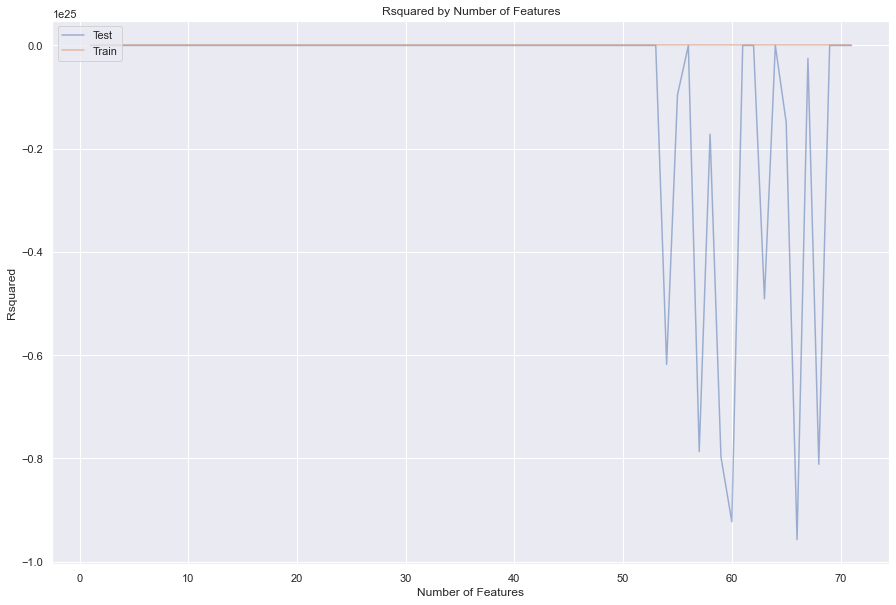

In [52]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test, test_scores, train_scores = find_optimal_lm_mod(df, 
                                                                                                                             relevant[:te_sc.nofeatures+1], 
                                                                                                                             y_target_col,
                                                                                                                             step=1, 
                                                                                                                             plot=True,
                                                                                                                             dropping_in_row_to_stop=3)

In [53]:
relevant[20:40]

number_of_reviews                                    0.098793
host_location_Schondorf, Bavaria, Germany            0.098487
host_neighbourhood_Ludwigsvorstadt - Isarvorstadt    0.097981
bathrooms_text_2.5 baths                             0.096700
Elevator                                             0.091354
host_response_time_within an hour                    0.091047
reviews_per_month                                    0.090578
bathrooms_text_1.5 baths                             0.087372
review_scores_value                                  0.086235
property_type_Private room in house                  0.084191
bathrooms_text_1.5 shared baths                      0.083767
bathrooms_text_3 baths                               0.082042
calculated_host_listings_count_private_rooms         0.080838
host_location_AU                                     0.078171
property_type_Entire loft                            0.077804
host_is_superhost                                    0.075994
Hotwater

In [54]:
pd.options.display.max_colwidth=200
df_coefs = pd.DataFrame()
df_coefs["feature"]=X_train.columns
df_coefs["coef"]=lm_model.coef_
df_coefs.sort_values('coef')

,feature,coef
29,property_type_Private room in house,-2.268906e+01
65,property_type_Private room in condominium,-2.251023e+01
66,Minifridge,-1.642843e+01
2,property_type_Private room in apartment,-1.543975e+01
64,Heating,-1.191318e+01
15,Freestreetparking,-1.127788e+01
62,Longtermstaysallowed,-8.690378e+00
30,bathrooms_text_1.5 shared baths,-7.562980e+00
22,host_neighbourhood_Ludwigsvorstadt - Isarvorstadt,-7.110049e+00
55,Bedlinens,-6.626594e+00
